##### Importing Libraries

In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB 
import warnings
warnings.filterwarnings('ignore')

##### Import Training Dataset

In [2]:
train = pd.read_csv('train.csv')

##### head() : Displays First 5 Rows of Dataset

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##### shape : This Is Used To Display Rows & Columns of Dataset 

In [4]:
train.shape

(42000, 785)

##### Drop traget value from data & store it in X, and store only target value in Y,  Target Value : label

In [5]:
X = train.drop(['label'],axis=1)
Y = train['label']

##### Split training dataset

In [6]:
xtrain , xtest , ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=42)

##### Size of splitted data

In [7]:
print("xtrain shape : ", xtrain.shape) 
print("xtest shape  : ", xtest.shape) 
print("ytrain shape : ", ytrain.shape) 
print("ytest shape  : ", ytest.shape) 

xtrain shape :  (33600, 784)
xtest shape  :  (8400, 784)
ytrain shape :  (33600,)
ytest shape  :  (8400,)


### Prediction Without Any Technique

##### Directly apply SVM without any technique applied on data

In [8]:
svmTesting = svm.SVC() #Classfier
svmTesting.fit(xtrain, ytrain) #Training by fitting into model
svmTestingPred = svmTesting.predict(xtest) #Prediction

In [9]:
svmAcc = metrics.accuracy_score(ytest,svmTestingPred) #Checking Accuracy Score
print('SVM Accuracy: ', svmAcc)

SVM Accuracy:  0.973452380952381


##### Naive Bayes (Without any technique applied)

In [10]:
bnbTesting = BernoulliNB() #Classifier
bnbTesting.fit(xtrain, ytrain) #Training by fitting into model
bnbTestingPred = bnbTesting.predict(xtest) #Prediction

In [11]:
bnbAcc = metrics.accuracy_score(ytest, bnbTestingPred) #Checking Accuracy Score
print ("Naive Bayes Accuracy: ", bnbAcc)

B. Naive Bayes Accuracy:  0.830595238095238


##### A DataFrame with results

In [12]:
resClass = {'Classifiers': [ 'SVC', 'Naive Bayes'], 
    'Accuracy (Without Technique)': [svmAcc, bnbAcc]}

result_df = pd.DataFrame(data=resClass)

In [13]:
result_df

,Classifiers,Accuracy (Without Technique)
0,SVC,0.973452
1,Naive Bayes,0.830595


##### Cross Validation

In [ ]:
# ======== SVM ======== 
svc_clf = svm.SVC()
svc_scores = cross_val_score(svc_clf, xtrain, ytrain, cv=6)
print('SVC Scores: ',svc_scores)
svc_mean = svc_scores.mean()

In [16]:
# ======== NAIVE BAYES ======== 
nav_clf = BernoulliNB()
nav_scores = cross_val_score(nav_clf, xtrain, ytrain, cv=6)
print('Naive Bayes Scores: ',nav_scores)
nav_mean =nav_scores.mean()

Naive Bayes Scores:  [0.82678571 0.83285714 0.82875    0.83982143 0.83214286 0.84392857]


In [18]:
cvData = {'Classifiers': [ 'SVC', 'Naive Bayes'], 
    'Cross Validation (Mean Scores)': [svc_mean, nav_mean]}

cv_df = pd.DataFrame(data=cvData)

In [19]:
cv_df

,Classifiers,Cross Validation (Mean Scores)
0,SVC,0.974048
1,Naive Bayes,0.834048


### Prediction Using Select K Best Method

In [26]:
def select_features(X_train,y_train,k,col):
    anova_features = SelectKBest(f_classif, k = k)
    X_kbest_features = anova_features.fit_transform(X, Y)
    index=anova_features.get_support(indices=True)
    return col[index]

In [27]:
col = X.columns

In [53]:
selected = select_features(X,Y,484,col)

In [54]:
df_selected_features=X[selected]

In [55]:
df_selected_features.head()

,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,...,pixel738,pixel739,pixel740,pixel741,pixel742,pixel743,pixel744,pixel745,pixel746,pixel770
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
xtrain , xtest , ytrain, ytest = train_test_split(df_selected_features,Y,test_size=0.2,random_state=42)

In [57]:
print("xtrain shape : ", xtrain.shape) 
print("xtest shape  : ", xtest.shape) 
print("ytrain shape : ", ytrain.shape) 
print("ytest shape  : ", ytest.shape) 

xtrain shape :  (33600, 484)
xtest shape  :  (8400, 484)
ytrain shape :  (33600,)
ytest shape  :  (8400,)


In [58]:
skb_svc_clf = svm.SVC()
skb_svc_clf.fit(xtrain, ytrain)
skb_svcPred = skb_svc_clf.predict(xtest)

In [59]:
skb_svcAcc = metrics.accuracy_score(ytest, skb_svcPred)
print('SelectKBest (SVM): ', skb_svcAcc)

SelectKBest (SVM):  0.975


In [60]:
skb_bnb_clf = BernoulliNB()
skb_bnb_clf.fit(xtrain, ytrain)
skb_bnbPred = skb_bnb_clf.predict(xtest)

In [61]:
skb_bnbAcc = metrics.accuracy_score(ytest, skb_bnbPred)
print ("SelectKBest (Naive Bayes): ", skb_bnbAcc)

SelectKBest (Naive Bayes):  0.8272619047619048


In [62]:
skbData = {'Classifiers': [ 'SVC', 'Naive Bayes'], 
    'SelectKBest (Accuracy)': [skb_svcAcc, skb_bnbAcc]}

skb_df = pd.DataFrame(data=skbData)

In [63]:
skb_df

,Classifiers,SelectKBest (Accuracy)
0,SVC,0.975000
1,Naive Bayes,0.827262


### Using Test Data For Prediction Using SVM

In [64]:
test = pd.read_csv('test.csv')

In [66]:
test_col = df_selected_features.columns

In [74]:
tCol = list(test_col)

In [76]:
test_svm_pred = skb_svc_clf.predict(test[tCol])

In [77]:
ImageId = [i+1 for i in range(len(test_svm_pred))]
mainFileSubmit = pd.DataFrame({'ImageId':ImageId,'Label':(test_svm_pred)})

In [78]:
mainFileSubmit.to_csv('submitKaggle-DR.csv', index=False)

In [79]:
mainFileSubmit

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


## Notebook Description

1) Imported all neccessary libraries like pandas for making dataframe and getting csv file, sklearn for Algorithms like SVM, Naive Bayes, feature selection to select best features, model selection for splitting data and for cross validation, metrics for accuracy.

2.1) Firstly Worked without using any technique.
    - Imported training dataset.
    - Split dataset into 80% - 20%
    - Apply SVM and get accuracy of 0.973452380952381
    - Apply Naive Bayes and get accuracy of 0.830595238095238
    - Add results into dataframe and displayed properly.

2.2) Applied Cross Validation on SVM and Naive Bayes both and get mean of the cross validated values of both, save in a dataframe and displayed it.

2.3) Now Predicted Values using SelectKBest (Feature Selection Technique).
    - taken all columns without target feature and pass it to selectKbest function with value of 484 which refers that I want top best 484 columns from the whole data.
    - Differenciate selected columns and make a separate dataframe from it.
    - Split the dataframe.
    - predict with SVM and Naive Bayes.
    - Now with SVM we get accuracy of 0.975
    - With Naive Bayes we get accuracy of 0.8272619047619048
    - Save both results in a dataframe.

3) Use Test data for prediction now using SVM as we have best accuracy with svm.
3.1) Take selected columns into a list and then predict data using svm for test dataset with the predicted columns.

4) For Submission to make file in specific format we add ImageId column as an index column which starts from 1 to 28000, and 2nd column for predictions.

5) save the dataframe in a csv file and upload on kaggle.

6) Score (0.97464) Obtained from kaggle with SVM accuracy 0.975 Is shown in Image Below.

##### References:
* Using your links (provided in task list) and scikit learn documentation.
* May be any other resource also like searched on google.

##### Problems:
* Not able to tackle Convolution till yet I think lacking somewhere but couldnt able to capture that but working on that.

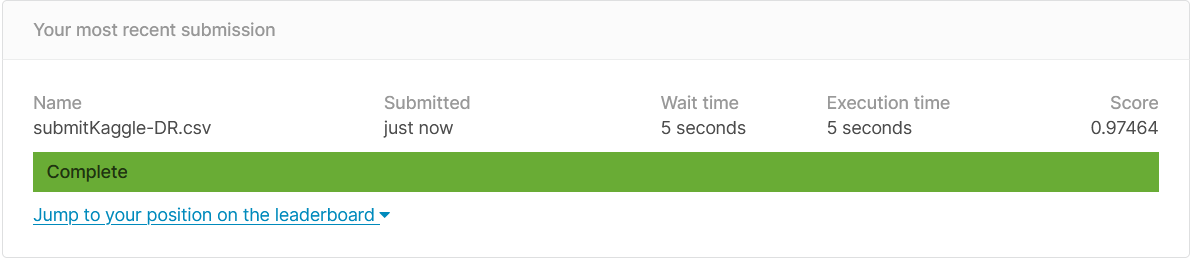